In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pydot
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Data preprocessing 

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
x_train = tf.expand_dims(x_train, axis=-1, name=None)
x_test = tf.expand_dims(x_test, axis=-1, name=None)

In [6]:
x_train.shape, x_test.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

In [7]:
y_train = keras.utils.to_categorical(y_train, 10, dtype='uint8')
y_test = keras.utils.to_categorical(y_test, 10, dtype='uint8')

# Model Designing

In [8]:
input_shape = (28, 28, 1)
classes = 10
epochs = 10
batch_size = 128

## 1-Conv | 2-Conv | 3-Conv CNN 

#### Add or Remove the CNN layers below to see the performance difference

In [9]:
model = keras.Sequential()

In [10]:
model.add(keras.Input(shape=input_shape))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.9))
model.add(layers.Dense(classes, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                3

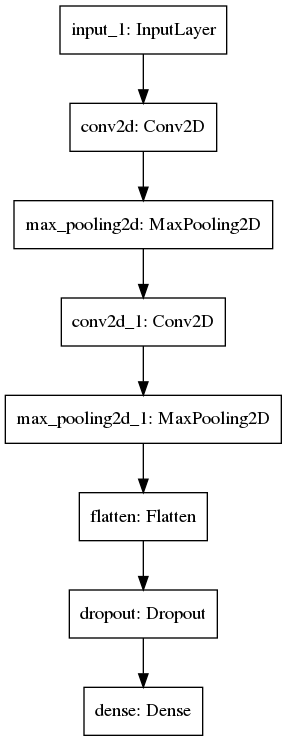

In [12]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [186]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [187]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, 
                    use_multiprocessing=True)

Epoch 1/10
422/422 [==============================] - 31s 73ms/step - loss: 2.3414 - accuracy: 0.5769 - val_loss: 0.1995 - val_accuracy: 0.9510
Epoch 2/10
422/422 [==============================] - 30s 72ms/step - loss: 0.5821 - accuracy: 0.8249 - val_loss: 0.1037 - val_accuracy: 0.9700
Epoch 3/10
422/422 [==============================] - 30s 72ms/step - loss: 0.4356 - accuracy: 0.8673 - val_loss: 0.0837 - val_accuracy: 0.9760
Epoch 4/10
422/422 [==============================] - 32s 76ms/step - loss: 0.3491 - accuracy: 0.8946 - val_loss: 0.0736 - val_accuracy: 0.9822
Epoch 5/10
422/422 [==============================] - 33s 78ms/step - loss: 0.2955 - accuracy: 0.9108 - val_loss: 0.0586 - val_accuracy: 0.9847
Epoch 6/10
422/422 [==============================] - 32s 76ms/step - loss: 0.2713 - accuracy: 0.9181 - val_loss: 0.0575 - val_accuracy: 0.9838
Epoch 7/10
422/422 [==============================] - 30s 72ms/step - loss: 0.2508 - accuracy: 0.9241 - val_loss: 0.0522 - val_accuracy:

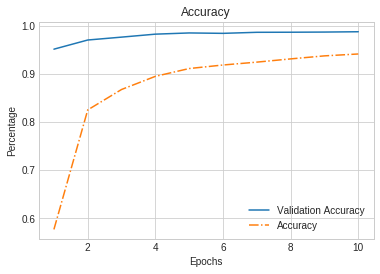

In [188]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.title('Accuracy')

x = np.arange(1,epochs+1)
val_accuracy = history.history.get('val_accuracy')
accuracy = history.history.get('accuracy')

plt.plot(x, val_accuracy, label='Validation Accuracy')
plt.plot(x, accuracy, linestyle='dashdot', label='Accuracy')

plt.legend()
plt.show()

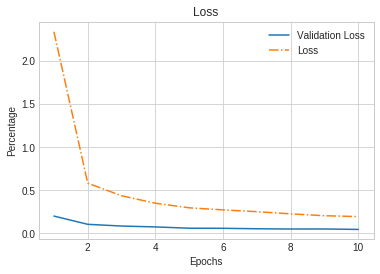

In [189]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.title('Loss')

x = np.arange(1,epochs+1)
val_loss = history.history.get('val_loss')
loss = history.history.get('loss')

plt.plot(x, val_loss, label='Validation Loss')
plt.plot(x, loss, linestyle='dashdot', label='Loss')

plt.legend()
plt.show()

# Evaluation

In [190]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy - %s%%' %round(score[1] * 100, 4))
print('Loss - %s%%' % round(score[0] * 100, 4))

Accuracy - 98.33%
Loss - 4.9091%
